# Tensorflow and Keras Basics

Problem: we want to predict the price of the gem stone based on the features 1 and 2.

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns

In [57]:
folder_path = 'drive/MyDrive/TensorFlow-Data'

file_path = folder_path + '/fake_reg.csv'

## 1) read in your data

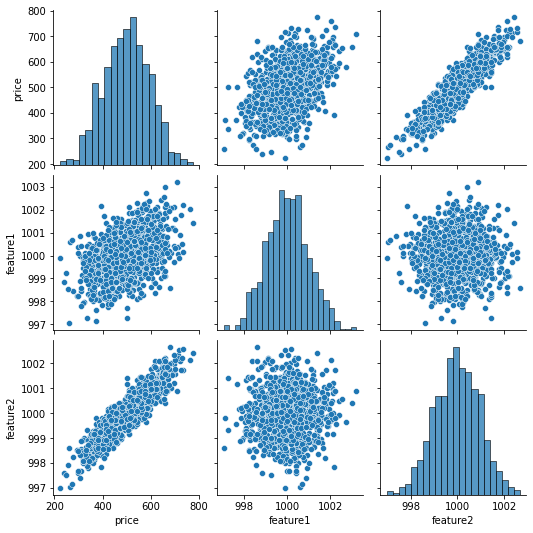

In [59]:
sns.pairplot(df);

In [58]:
df = pd.read_csv(file_path)
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


## 2) Split the data 

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
# as numpy array

X = df[['feature1', 'feature2']].values 
y = df['price'].values 

In [62]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 2), (300, 2), (700,), (300,))

## 3) Normalize / Scaling Data

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler()

In [67]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # to avoid data leakage, no need to fit on test data

In [68]:
X_train.min(),X_train.max(), X_test.min(), X_test.max()

(0.0, 1.0, -0.014108392024496652, 1.0186515935232023)

## 4) Model Building

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

There are 2 ways to create the model.


In [70]:
# approach 1)
model = Sequential([Dense(units=4, activation='relu'),  # pass the list of Dense / Layers , units is the number of neurons for that specific layer
                                Dense(units=3, activation='relu'),
                                Dense(units=1)])

In [71]:
# approach 2) Preferred Method
model = Sequential()

model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))

model.add(Dense(units=1)) # output layer

model.compile(optimizer='rmsprop', loss='mse')

## 5) Training Model

In [72]:
# simple training
model.fit(x=X_train,
               y=y_train,
               epochs=250,
               verbose=1)

Epoch 1/250
22/22 [==============================] - 1s 1ms/step - loss: 250716.2235
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256746.9368
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 255321.5625
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256463.5299
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 258225.2880
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 257861.1936
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 251084.5245
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 254045.0476
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 255123.0102
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 255314.4062
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 247535.1488
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

We can see that loss is very high at the beginning. However it gets lower and lower after each training.

### Checking the history of training as Dictionary

In [73]:
# Checking the history of training as Dictionary
model.history.history

{'loss': [256578.671875,
  256443.296875,
  256300.734375,
  256140.296875,
  255860.703125,
  255505.09375,
  255141.125,
  254750.21875,
  254326.125,
  253857.21875,
  253335.515625,
  252771.40625,
  252159.015625,
  251480.9375,
  250734.515625,
  249917.1875,
  249022.125,
  248052.453125,
  247002.96875,
  245855.390625,
  244616.5,
  243265.296875,
  241807.015625,
  240233.234375,
  238531.8125,
  236710.5625,
  234737.640625,
  232642.859375,
  230400.0625,
  228003.546875,
  225444.40625,
  222729.765625,
  219832.5,
  216782.578125,
  213558.421875,
  210147.703125,
  206552.109375,
  202767.203125,
  198789.890625,
  194616.734375,
  190277.515625,
  185725.4375,
  180994.0625,
  176066.46875,
  170956.90625,
  165654.65625,
  160176.796875,
  154501.671875,
  148661.09375,
  142655.046875,
  136492.0625,
  130176.0078125,
  123739.8046875,
  117203.78125,
  110547.5546875,
  103820.421875,
  97033.484375,
  90212.171875,
  83376.40625,
  76563.078125,
  69768.7578125,
  6

In [74]:
loss_df = pd.DataFrame(model.history.history)

In [75]:
loss_df.head()

,loss
0,256578.671875
1,256443.296875
2,256300.734375
3,256140.296875
4,255860.703125


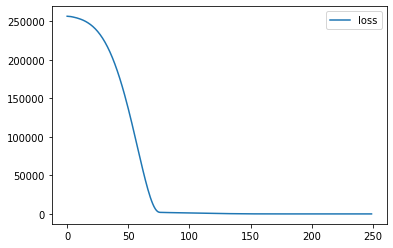

In [76]:
loss_df.plot();

## 6) Model Evaluation

There are multiple ways to do model evaluation.

* `model.evaluate()`
* get the actual predictions using `model.predict()`, then compare with actual value.
* using evaluation metrics such as MAE, MSE, RMSE

### model.evaluate()

In [77]:
# method 1) 
model.evaluate(X_test, y_test, verbose=0)

25.1767520904541

In [78]:
model.evaluate(X_train, y_train, verbose=0)

23.773704528808594

### Comparing predictions values and actual values

In [80]:
# method 2)

# get the predictions
test_predictions = model.predict(X_test)

In [82]:
test_predictions[:5]

array([[405.28   ],
       [623.64764],
       [592.2865 ],
       [572.4104 ],
       [366.54352]], dtype=float32)

In [83]:
# convert to pandas series
test_predictions = pd.Series(test_predictions.reshape(300,))
test_predictions

0      405.279999
1      623.647644
2      592.286499
3      572.410400
4      366.543518
          ...    
295    529.293335
296    515.599976
297    609.780334
298    416.956970
299    410.898499
Length: 300, dtype: float32

In [88]:
# Create dataframe of True Y labels values
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df.head()

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104


In [89]:
# Then combine with Predictions
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.head()

,Test True Y,0
0,402.296319,405.279999
1,624.156198,623.647644
2,582.455066,592.286499
3,578.588606,572.410400
4,371.224104,366.543518


In [91]:
# then change the columns name of dataframe
pred_df.columns=['Test True Y', 'Model Prediction']
pred_df.head()

,Test True Y,Model Prediction
0,402.296319,405.279999
1,624.156198,623.647644
2,582.455066,592.286499
3,578.588606,572.410400
4,371.224104,366.543518


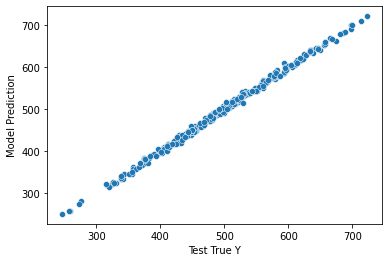

In [92]:
# plot the values
sns.scatterplot(data=pred_df, x='Test True Y', y='Model Prediction');

**How to interpret the above scatter plot?**

Well .. if our model predict the same value as the truth label, there should be perfect line as those values will be overlapped on each other.

However, we can see that it is not the case for our model. There are some differences between model predictions and actual label values. But overall, our model is performing quite well.

### using Evaluation Metrics

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [94]:
# MAE
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Prediction'])

4.021211538357517

We can see that thare is about `4$`off (+-) from the actual value based on MAE. But how do we know this is good or bad?

Let's look at describe () on original data.

Min is `223$` and Max is `774$.` Mean value is `498$`. So our MAE value of `4$` is about `0.8032%` which is pretty good value.

**It is important that we need to look at the Context of the problem we are trying to solve when we try to interpret those metrics like MAE is good or bad.**

In [96]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [99]:
(4/498) * 100

0.8032128514056224

In [100]:
# MSE
mean_squared_error(pred_df['Test True Y'], pred_df['Model Prediction'])

25.17677855251499

In [101]:
# RMSE
np.sqrt(mean_squared_error(pred_df['Test True Y'], pred_df['Model Prediction']))

5.017646714597889

## 7) Predictions on New Value

Let's say we find a new gem stone with the following features, how much would it be worth?

In [107]:
new_gem = [[998, 1000]]

Before we predict the price, we need to scale down the features of the new gem. The reason is our model is trained on the scaled data.


In [108]:
new_gem = scaler.transform(new_gem)
new_gem

array([[0.14117652, 0.53968792]])

In [109]:
model.predict(new_gem)

array([[419.75793]], dtype=float32)

We can see that our model has predicted that the new gem we found is worth around `$419`.

## 8) Save and Load trained Model


In [110]:
from tensorflow.keras.models import load_model

In [112]:
model.save(folder_path + '/models/my_gem_model.h5')

In [113]:
loaded_model = load_model(folder_path + '/models/my_gem_model.h5')

In [114]:
loaded_model.predict(new_gem)

array([[419.75793]], dtype=float32)